In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf

In [3]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("netflix_titles.csv")

In [5]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [10]:
df.shape

(8807, 12)

In [11]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [13]:
df.loc[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [14]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [15]:
df.loc[df.isnull().any(axis = 1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [16]:
df = df[['type','title','country','release_year','rating','duration','listed_in']]

In [17]:
df

,type,title,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,NaN,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies"


In [18]:
df.isnull()

,type,title,country,release_year,rating,duration,listed_in
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False
8803,False,False,True,False,False,False,False
8804,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

type              0
title             0
country         831
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64

In [20]:
pd.options.mode.chained_assignment=None

In [21]:
df.dropna(inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7970 entries, 0 to 8806
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7970 non-null   object
 1   title         7970 non-null   object
 2   country       7970 non-null   object
 3   release_year  7970 non-null   int64 
 4   rating        7970 non-null   object
 5   duration      7970 non-null   object
 6   listed_in     7970 non-null   object
dtypes: int64(1), object(6)
memory usage: 498.1+ KB


In [23]:
df

,type,title,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,The Great British Baking Show,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...
8801,Movie,Zinzana,"United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
8802,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8804,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies"


In [24]:
df.dtypes

type            object
title           object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [25]:
df.head()

,type,title,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,The Great British Baking Show,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"


In [26]:
df.tail()

,type,title,country,release_year,rating,duration,listed_in
8801,Movie,Zinzana,"United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
8802,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8804,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies"
8806,Movie,Zubaan,India,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals"


In [27]:
df.shape

(7970, 7)

In [28]:
df.loc[df["release_year"] == 2000]

,type,title,country,release_year,rating,duration,listed_in
350,Movie,Space Cowboys,United States,2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy"
359,Movie,The Original Kings of Comedy,United States,2000,R,111 min,Stand-Up Comedy
566,Movie,Charlie's Angels,"United States, Germany",2000,PG-13,98 min,"Action & Adventure, Comedies"
593,Movie,Snow Day,United States,2000,PG,89 min,"Children & Family Movies, Comedies"
779,Movie,Battlefield Earth,United States,2000,PG-13,118 min,"Action & Adventure, Cult Movies, Sci-Fi & Fantasy"
952,Movie,The Whole Nine Yards,United States,2000,R,99 min,"Action & Adventure, Comedies"
2173,TV Show,Moesha,United States,2000,TV-PG,6 Seasons,"TV Comedies, Teen TV Shows"
3472,Movie,Rugrats in Paris: The Movie,"Germany, United States",2000,G,79 min,"Children & Family Movies, Comedies"
4545,Movie,Monty Python: Before the Flying Circus,United Kingdom,2000,TV-MA,56 min,"Comedies, Documentaries"
4723,Movie,Fiza,India,2000,TV-14,163 min,"Dramas, International Movies, Music & Musicals"


In [29]:
df.loc[df["release_year"] == 2020]

,type,title,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
17,TV Show,Falsa identidad,Mexico,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ..."
32,TV Show,Sex Education,United Kingdom,2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C..."
84,Movie,Omo Ghetto: the Saga,Nigeria,2020,TV-MA,147 min,"Action & Adventure, Comedies, Dramas"
126,Movie,Shikara,India,2020,TV-14,115 min,"Dramas, International Movies, Romantic Movies"
...,...,...,...,...,...,...,...
5972,Movie,#cats_the_mewvie,Canada,2020,TV-14,90 min,"Documentaries, International Movies"
7594,Movie,Norm of the North: Family Vacation,United States,2020,TV-Y7,89 min,Children & Family Movies
8099,Movie,Straight Up,United States,2020,TV-MA,96 min,"Comedies, Independent Movies, LGBTQ Movies"
8125,TV Show,Super Wings,"United States, South Korea, China",2020,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows"


In [30]:
df.loc[df["release_year"] == 2021]

,type,title,country,release_year,rating,duration,listed_in
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
8,TV Show,The Great British Baking Show,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,Movie,The Starling,United States,2021,PG-13,104 min,"Comedies, Dramas"
12,Movie,Je Suis Karl,"Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
...,...,...,...,...,...,...,...
1468,Movie,What Happened to Mr. Cha?,South Korea,2021,TV-MA,102 min,"Comedies, International Movies"
1551,TV Show,Hilda,"United Kingdom, Canada, United States",2021,TV-Y7,2 Seasons,Kids' TV
1696,TV Show,Polly Pocket,"Canada, United States, Ireland",2021,TV-Y,2 Seasons,Kids' TV
2920,TV Show,Love Is Blind,United States,2021,TV-MA,1 Season,"Reality TV, Romantic TV Shows"


In [31]:
df.loc[df["release_year"] == 2022]

,type,title,country,release_year,rating,duration,listed_in


In [32]:
df.loc[df["rating"] == "R"]

,type,title,country,release_year,rating,duration,listed_in
46,Movie,Safe House,"South Africa, United States, Japan",2012,R,115 min,Action & Adventure
48,Movie,Training Day,United States,2001,R,122 min,"Dramas, Thrillers"
81,Movie,Kate,United States,2021,R,106 min,Action & Adventure
122,Movie,In the Cut,"United Kingdom, Australia, France, United States",2003,R,118 min,Thrillers
131,Movie,Blade Runner: The Final Cut,United States,1982,R,117 min,"Action & Adventure, Classic Movies, Cult Movies"
...,...,...,...,...,...,...,...
8765,Movie,XX,"Canada, United States",2017,R,81 min,Horror Movies
8768,Movie,Y Tu Mamá También,Mexico,2001,R,106 min,"Dramas, Independent Movies, International Movies"
8791,Movie,Young Adult,United States,2011,R,94 min,"Comedies, Dramas, Independent Movies"
8802,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers"


In [33]:
df.loc[df["rating"] == "TV-MA"]

,type,title,country,release_year,rating,duration,listed_in
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
12,Movie,Je Suis Karl,"Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"
15,TV Show,Dear White People,United States,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas"
...,...,...,...,...,...,...,...
8762,Movie,Wrong Side Raju,India,2016,TV-MA,140 min,"Dramas, International Movies"
8769,Movie,Y.M.I.: Yeh Mera India,India,2008,TV-MA,137 min,"Dramas, Independent Movies, International Movies"
8788,Movie,You Carry Me,"Croatia, Slovenia, Serbia, Montenegro",2015,TV-MA,157 min,"Dramas, International Movies"
8798,Movie,Zed Plus,India,2014,TV-MA,131 min,"Comedies, Dramas, International Movies"


In [34]:
df.loc[df["rating"] == "TV-Y7"]

,type,title,country,release_year,rating,duration,listed_in
37,TV Show,Angry Birds,Finland,2018,TV-Y7,1 Season,"Kids' TV, TV Comedies"
39,TV Show,Chhota Bheem,India,2021,TV-Y7,3 Seasons,Kids' TV
40,TV Show,He-Man and the Masters of the Universe,United States,2021,TV-Y7,1 Season,"Kids' TV, TV Sci-Fi & Fantasy"
97,TV Show,Kid Cosmic,United States,2021,TV-Y7,2 Seasons,"Kids' TV, TV Comedies, TV Sci-Fi & Fantasy"
120,TV Show,Heroes of Goo Jit Zu,Australia,2021,TV-Y7,1 Season,"Kids' TV, TV Comedies"
...,...,...,...,...,...,...,...
8714,Movie,Welcome to Monster High: The Origin Story,United States,2016,TV-Y7,73 min,Children & Family Movies
8780,TV Show,Yo-Kai Watch,United States,2015,TV-Y7,1 Season,"Anime Series, Kids' TV"
8781,Movie,Yo-Kai Watch: The Movie,"Japan, United States",2016,TV-Y7,96 min,"Anime Features, Children & Family Movies"
8795,TV Show,Yu-Gi-Oh! Arc-V,"Japan, Canada",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV"


In [35]:
df.loc[df["rating"] == "TV-14"]

,type,title,country,release_year,rating,duration,listed_in
8,TV Show,The Great British Baking Show,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
21,TV Show,Resurrection: Ertugrul,Turkey,2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,..."
24,Movie,Jeans,India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
25,TV Show,Love on the Spectrum,Australia,2021,TV-14,2 Seasons,"Docuseries, International TV Shows, Reality TV"
51,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Japan,2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio..."
...,...,...,...,...,...,...,...
8772,Movie,Yamla Pagla Deewana 2,India,2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo..."
8774,Movie,يوم الدين,"Egypt, Austria, United States",2018,TV-14,97 min,"Dramas, Independent Movies, International Movies"
8794,Movie,اشتباك,"Egypt, France",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies"
8799,Movie,Zenda,India,2009,TV-14,120 min,"Dramas, International Movies"


In [36]:
df.loc[df["rating"] == "PG-13"]

,type,title,country,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
9,Movie,The Starling,United States,2021,PG-13,104 min,"Comedies, Dramas"
27,Movie,Grown Ups,United States,2010,PG-13,103 min,Comedies
28,Movie,Dark Skies,United States,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy"
29,Movie,Paranoia,"United States, India, France",2013,PG-13,106 min,Thrillers
...,...,...,...,...,...,...,...
8757,Movie,World Trade Center,United States,2006,PG-13,129 min,"Action & Adventure, Dramas"
8764,Movie,Wyatt Earp,United States,1994,PG-13,191 min,Action & Adventure
8766,Movie,XXx,United States,2002,PG-13,124 min,"Action & Adventure, Sports Movies"
8767,Movie,XXX: State of the Union,United States,2005,PG-13,101 min,Action & Adventure


In [37]:
df.corr()

,release_year
release_year,1.0


In [38]:
df["zscore_release_year"] = np.abs(stats.zscore(df["release_year"]))

In [39]:
df

,type,title,country,release_year,rating,duration,listed_in,zscore_release_year
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,0.682415
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",0.794018
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",0.794018
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2.330858
8,TV Show,The Great British Baking Show,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",0.794018
...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,"United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",0.124401
8802,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",0.768420
8804,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies",0.545215
8805,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies",0.880023


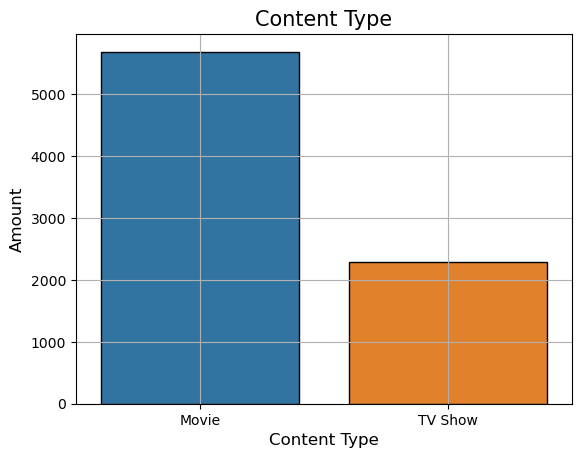

In [119]:
sns.countplot(x="type",data=df,ec="black",lw=1)
plt.title("Content Type",fontsize=15)
plt.xlabel("Content Type",fontsize=12)
plt.ylabel("Amount",fontsize=12)
plt.grid(True)
plt.show()

In [41]:
df.type.value_counts()

Movie      5687
TV Show    2283
Name: type, dtype: int64

In [42]:
df.rating.value_counts()

TV-MA       2931
TV-14       1930
R            788
TV-PG        773
PG-13        482
PG           281
TV-Y7        236
TV-Y         227
TV-G         190
NR            80
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

In [43]:
df.country.value_counts()

United States                             2815
India                                      972
United Kingdom                             419
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [44]:
df.release_year.value_counts()

2018    1038
2017     965
2019     913
2020     852
2016     838
        ... 
1964       2
1966       1
1959       1
1947       1
1961       1
Name: release_year, Length: 73, dtype: int64

In [45]:
movies = df[df["type"]=="Movie"]

In [46]:
movies

,type,title,country,release_year,rating,duration,listed_in,zscore_release_year
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,0.682415
7,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2.330858
9,Movie,The Starling,United States,2021,PG-13,104 min,"Comedies, Dramas",0.794018
12,Movie,Je Suis Karl,"Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",0.794018
24,Movie,Jeans,India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",1.772845
...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,"United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",0.124401
8802,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",0.768420
8804,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies",0.545215
8805,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies",0.880023


In [47]:
tv = df[df["type"]=="TV Show"]

In [48]:
tv

,type,title,country,release_year,rating,duration,listed_in,zscore_release_year
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",0.794018
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",0.794018
8,TV Show,The Great British Baking Show,United Kingdom,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",0.794018
15,TV Show,Dear White People,United States,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",0.794018
17,TV Show,Falsa identidad,Mexico,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",0.682415
...,...,...,...,...,...,...,...,...
8780,TV Show,Yo-Kai Watch,United States,2015,TV-Y7,1 Season,"Anime Series, Kids' TV",0.124401
8795,TV Show,Yu-Gi-Oh! Arc-V,"Japan, Canada",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",0.124401
8796,TV Show,Yunus Emre,Turkey,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",0.236004
8797,TV Show,Zak Storm,"United States, France, South Korea, Indonesia",2016,TV-Y7,3 Seasons,Kids' TV,0.236004


In [123]:
movies["country"].value_counts()

United States                            2055
India                                     893
United Kingdom                            206
Canada                                    122
Spain                                      97
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 651, dtype: int64

In [50]:
tv["country"].value_counts()

United States                                    760
United Kingdom                                   213
Japan                                            168
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 196, dtype: int64

In [51]:
tv["country"].value_counts().index[0:10] #top 10 countries to produce tv shows on Netflix

Index(['United States', 'United Kingdom', 'Japan', 'South Korea', 'India',
       'Taiwan', 'Canada', 'France', 'Spain', 'Australia'],
      dtype='object')

In [52]:
movies["country"].value_counts().index[0:10] #top 10 countries to produce movies on Netflix

Index(['United States', 'India', 'United Kingdom', 'Canada', 'Spain', 'Egypt',
       'Nigeria', 'Indonesia', 'Turkey', 'Japan'],
      dtype='object')

In [53]:
df["release_year"]

0       2020
1       2021
4       2021
7       1993
8       2021
        ... 
8801    2015
8802    2007
8804    2009
8805    2006
8806    2015
Name: release_year, Length: 7970, dtype: int64

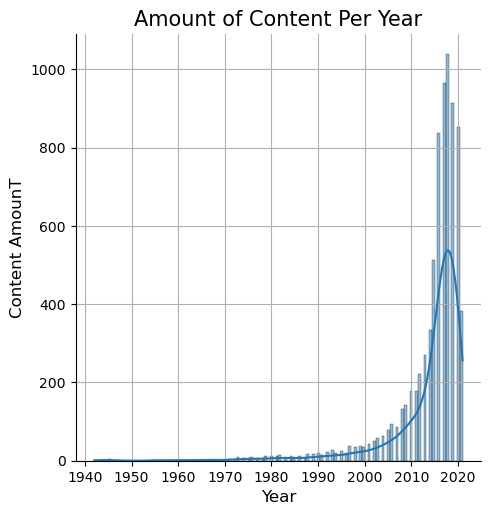

In [114]:
sns.displot(df["release_year"],kde=True)

plt.ylabel("Content AmounT",fontsize=12)
plt.xlabel("Year",fontsize=12)
plt.title("Amount of Content Per Year",fontsize=15)

plt.grid(True)
plt.show()

In [55]:
# There has been a significant increase of content nearing 2020, but a decrease afterwards, possibly due to COVID-19 making content creation more difficult due to restrictions

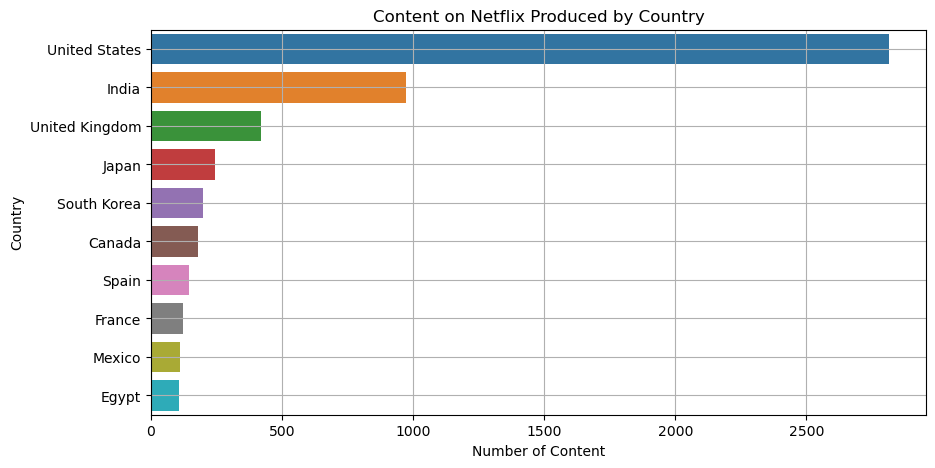

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(y="country",order=df["country"].value_counts().index[0:10],data=df)
plt.title("Content on Netflix Produced by Country")
plt.xlabel("Number of Content")
plt.ylabel("Country")
plt.grid(True)
plt.show()

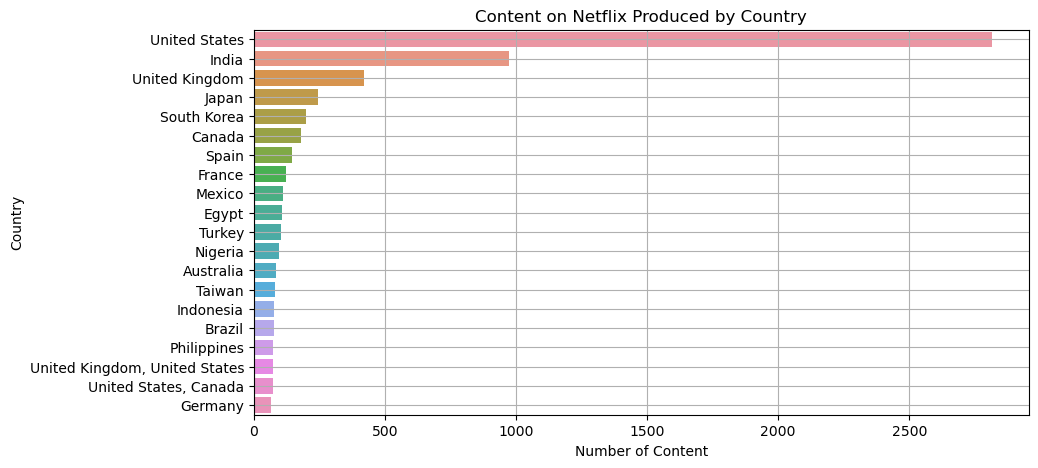

In [116]:
plt.figure(figsize=(10,5))
sns.countplot(y="country",order=df["country"].value_counts().index[0:20],data=df)
plt.title("Content on Netflix Produced by Country")
plt.xlabel("Number of Content")
plt.ylabel("Country")
plt.grid(True)
plt.show() #prettier colors

In [58]:
df.country.value_counts().head(20) #the last two are collaberations, so I won't count them

United States                    2815
India                             972
United Kingdom                    419
Japan                             244
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          86
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
Name: country, dtype: int64

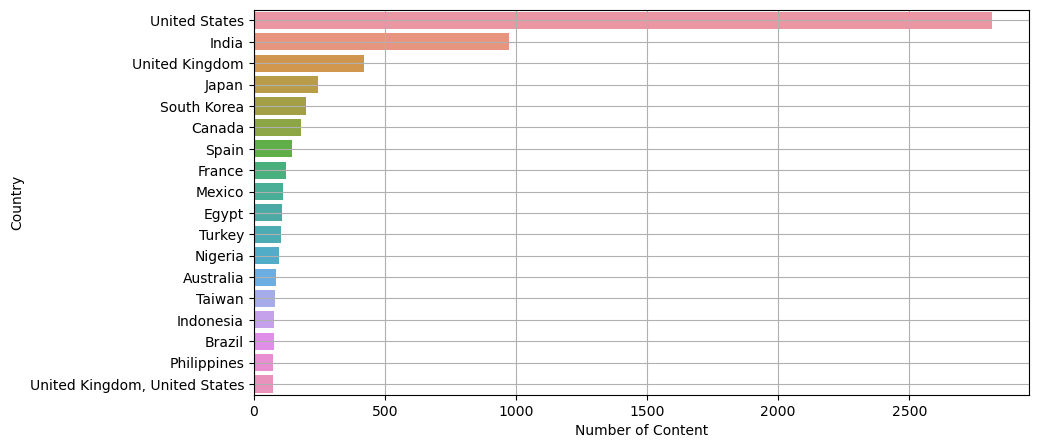

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(y="country",order=df["country"].value_counts().index[0:18],data=df)
plt.xlabel("Number of Content")
plt.ylabel("Country")
plt.ylabel("Country")
plt.grid(True)
plt.show() #prettier colors

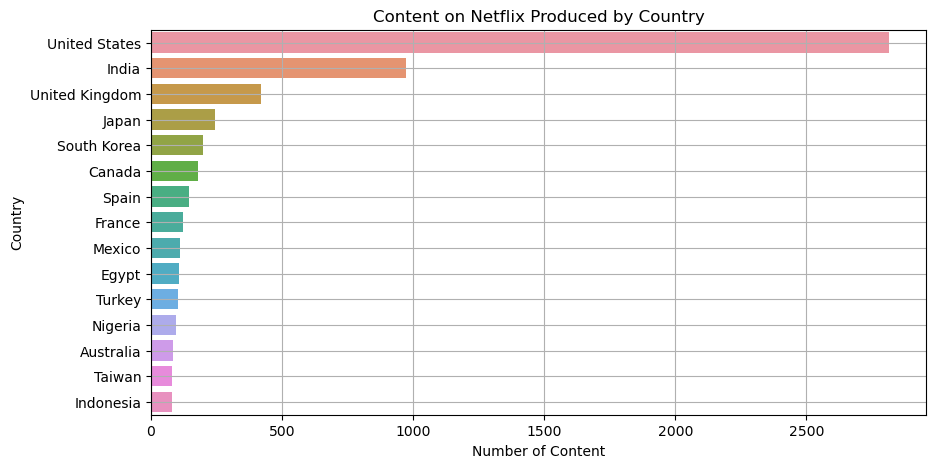

In [120]:
plt.figure(figsize=(10,5))
sns.countplot(y="country",order=df["country"].value_counts().index[0:15],data=df)
plt.title("Content on Netflix Produced by Country")
plt.xlabel("Number of Content")
plt.ylabel("Country")
plt.grid(True)
plt.show() #prettier colors

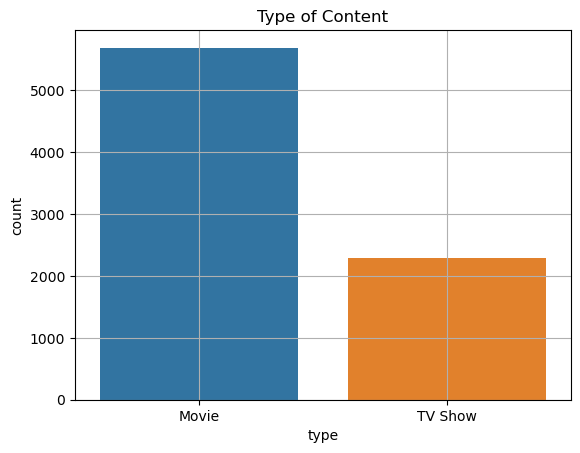

In [61]:
sns.countplot(x="type",data=df)
plt.title("Type of Content")
plt.grid(True)
plt.show()

In [62]:
df.type.value_counts()

Movie      5687
TV Show    2283
Name: type, dtype: int64

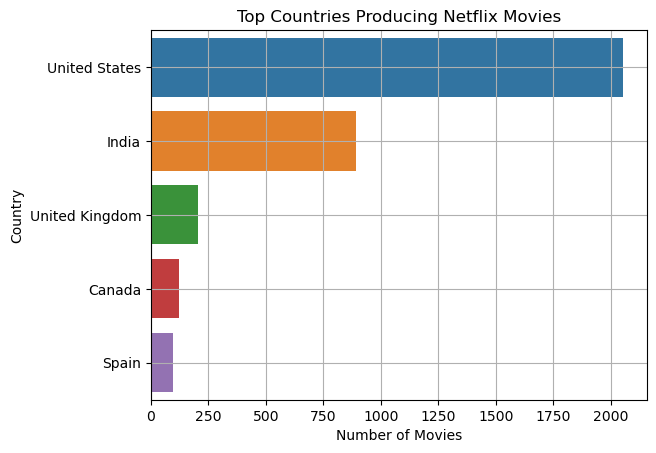

In [107]:
sns.countplot(y="country",order=movies["country"].value_counts().index[0:5],data=movies)
plt.title("Top Countries Producing Netflix Movies")
plt.xlabel("Number of Movies")
plt.ylabel("Country")
plt.grid(True)

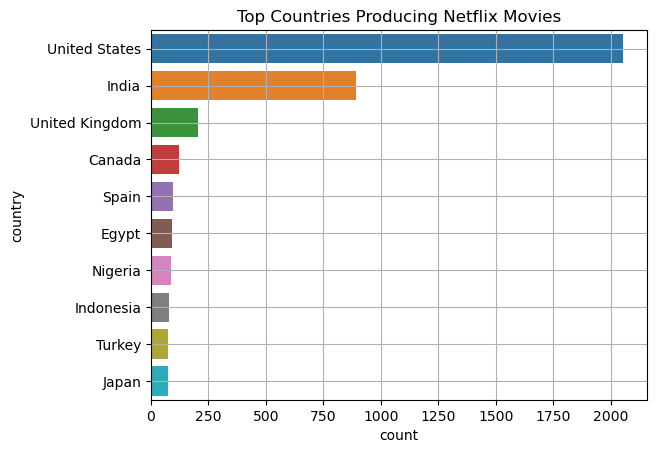

In [77]:
sns.countplot(y="country",order=movies["country"].value_counts().index[0:10],data=movies)
plt.title("Top Countries Producing Netflix Movies")
plt.grid(True)

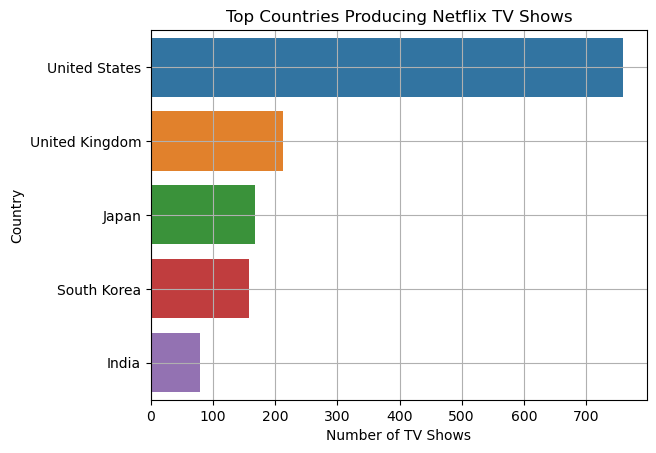

In [106]:
sns.countplot(y="country",order=tv["country"].value_counts().index[0:5],data=tv)
plt.title("Top Countries Producing Netflix TV Shows")
plt.xlabel("Number of TV Shows")
plt.ylabel("Country")
plt.grid(True)

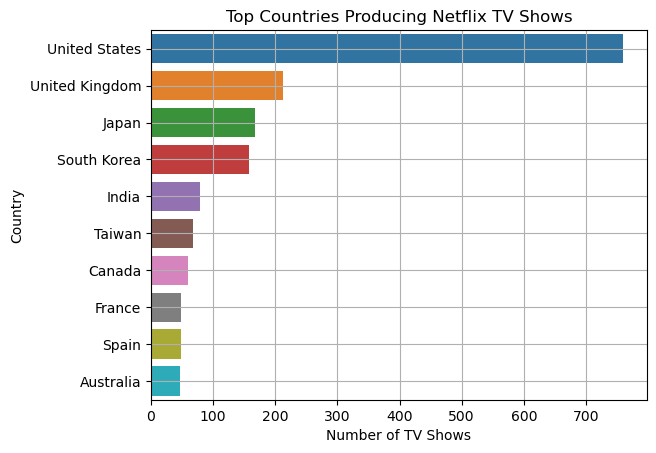

In [105]:
sns.countplot(y="country",order=tv["country"].value_counts().index[0:10],data=tv)
plt.title("Top Countries Producing Netflix TV Shows")
plt.xlabel("Number of TV Shows")
plt.ylabel("Country")
plt.grid(True)

In [67]:
df["listed_in"]

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
4       International TV Shows, Romantic TV Shows, TV ...
7        Dramas, Independent Movies, International Movies
8                            British TV Shows, Reality TV
                              ...                        
8801              Dramas, International Movies, Thrillers
8802                       Cult Movies, Dramas, Thrillers
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 7970, dtype: object

In [68]:
df["listed_in"].value_counts()

Documentaries                                         343
Dramas, International Movies                          337
Stand-Up Comedy                                       303
Comedies, Dramas, International Movies                260
Dramas, Independent Movies, International Movies      243
                                                     ... 
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Horror Movies, LGBTQ Movies, Music & Musicals           1
TV Horror, TV Mysteries, Teen TV Shows                  1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 498, dtype: int64

In [69]:
df["listed_in"].value_counts().keys()

Index(['Documentaries', 'Dramas, International Movies', 'Stand-Up Comedy',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies',
       'Children & Family Movies, Comedies', 'Kids' TV',
       'Documentaries, International Movies',
       'Dramas, International Movies, Romantic Movies',
       'Comedies, International Movies',
       ...
       'Docuseries, Spanish-Language TV Shows',
       'Kids' TV, Reality TV, Science & Nature TV',
       'British TV Shows, Kids' TV, TV Thrillers',
       'Kids' TV, TV Action & Adventure, TV Dramas',
       'TV Comedies, TV Dramas, TV Horror',
       'Children & Family Movies, Comedies, LGBTQ Movies',
       'Kids' TV, Spanish-Language TV Shows, Teen TV Shows',
       'Horror Movies, LGBTQ Movies, Music & Musicals',
       'TV Horror, TV Mysteries, Teen TV Shows',
       'Cult Movies, Dramas, Thrillers'],
      dtype='object', length=498)

In [70]:
df["duration"]

0          90 min
1       2 Seasons
4       2 Seasons
7         125 min
8       9 Seasons
          ...    
8801       96 min
8802      158 min
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 7970, dtype: object

In [71]:
df["duration"].value_counts()

1 Season      1456
2 Seasons      386
3 Seasons      188
90 min         147
94 min         141
              ... 
182 min          1
10 min           1
3 min            1
17 Seasons       1
191 min          1
Name: duration, Length: 212, dtype: int64

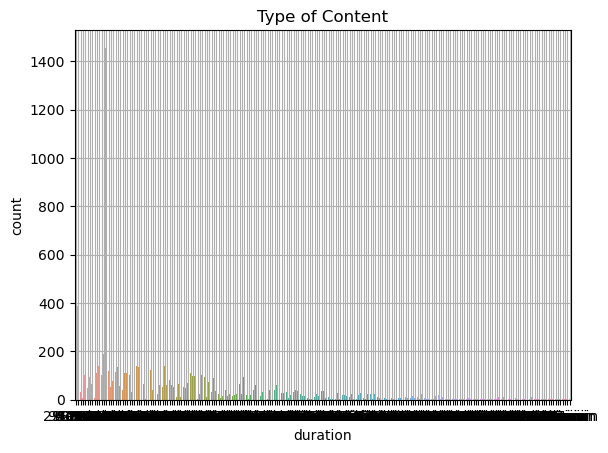

In [84]:
sns.countplot(x="duration",data=df)
plt.title("Type of Content")
plt.grid(True)
plt.show()

In [95]:
seasonsx =list(df["duration"].value_counts().head(3).keys())
seasonsx

['1 Season', '2 Seasons', '3 Seasons']

In [91]:
seasonsy =list(df["duration"].value_counts().head(3))
seasonsy

[1456, 386, 188]

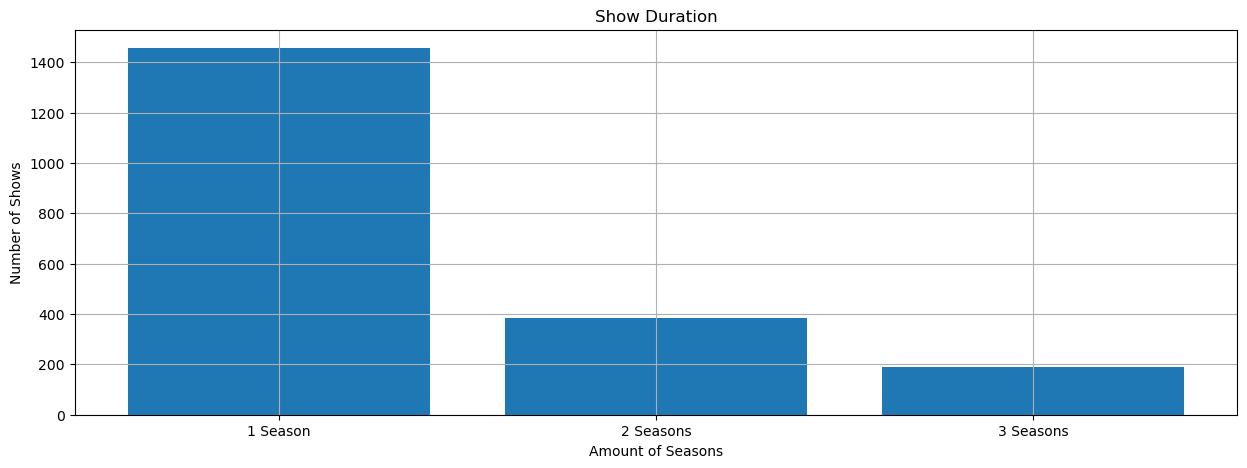

In [102]:
plt.figure(figsize=(15,5))
plt.bar(seasonsx,seasonsy)
plt.grid(True)
plt.title("Show Duration")
plt.xlabel("Amount of Seasons")
plt.ylabel("Number of Shows")
plt.show()

In [96]:
timex =list(df["duration"].value_counts().head(10).keys())
timex

['1 Season',
 '2 Seasons',
 '3 Seasons',
 '90 min',
 '94 min',
 '93 min',
 '97 min',
 '95 min',
 '91 min',
 '92 min']

In [98]:
timey =list(df["duration"].value_counts().head(10))
timey

[1456, 386, 188, 147, 141, 139, 138, 135, 134, 123]

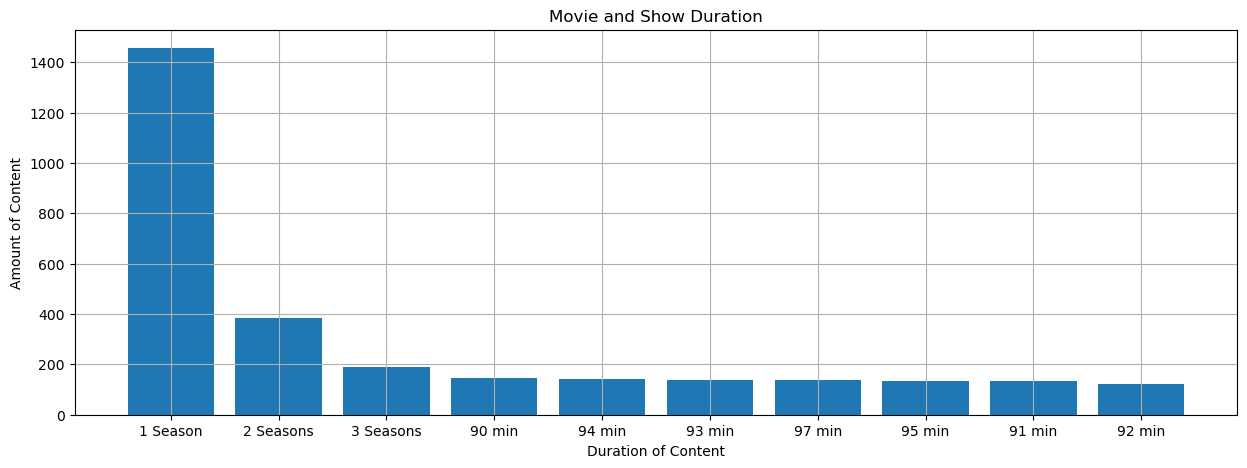

In [101]:
plt.figure(figsize=(15,5))
plt.bar(timex,timey)
plt.grid(True)
plt.title("Movie and Show Duration")
plt.xlabel("Duration of Content")
plt.ylabel("Amount of Content")
plt.show()